NAMA : Moh Wildan Haikhal
Kelas : 5MIM
NPM: 062140832958

# Importing Libraries

In [120]:
!pip install country_converter

In [121]:
!pip install pycountry

In [122]:
# default
import numpy as np
import pandas as pd

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import networkx as nx
import plotly.graph_objects as go
import country_converter as coco
from wordcloud import WordCloud
import pycountry

# Data Pre-processing

In [123]:
df = pd.read_csv('employeesampledata.csv', encoding='windows-1252')
df.shape

(1000, 14)

In [124]:
df.columns

Index(['EEID', 'Full Name', 'Job Title', 'Department', 'Business Unit',
       'Gender', 'Ethnicity', 'Age', 'Hire Date', 'Annual Salary', 'Bonus %',
       'Country', 'City', 'Exit Date'],
      dtype='object')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EEID           1000 non-null   object
 1   Full Name      1000 non-null   object
 2   Job Title      1000 non-null   object
 3   Department     1000 non-null   object
 4   Business Unit  1000 non-null   object
 5   Gender         1000 non-null   object
 6   Ethnicity      1000 non-null   object
 7   Age            1000 non-null   int64 
 8   Hire Date      1000 non-null   object
 9   Annual Salary  1000 non-null   object
 10  Bonus %        1000 non-null   object
 11  Country        1000 non-null   object
 12  City           1000 non-null   object
 13  Exit Date      85 non-null     object
dtypes: int64(1), object(13)
memory usage: 109.5+ KB


In [126]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,4/8/2016,"$141,604",15%,United States,Seattle,10/16/2021
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,11/29/1997,"$99,975",0%,China,Chongqing,NaN
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,10/26/2006,"$163,099",20%,United States,Chicago,NaN
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,9/27/2019,"$84,913",7%,United States,Chicago,NaN
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,11/20/1995,"$95,409",0%,United States,Phoenix,NaN


In [127]:
df.tail()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,9/18/2016,"$98,427",0%,United States,Columbus,NaN
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,5/31/2010,"$47,387",0%,China,Chengdu,1/8/2018
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,6/10/2019,"$176,710",15%,United States,Miami,NaN
998,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33,1/28/2012,"$95,960",0%,China,Chengdu,NaN
999,E03545,Sofia Cheng,Vice President,Accounting,Corporate,Female,Asian,63,7/26/2020,"$216,195",31%,United States,Miami,NaN


In [128]:
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio
Exit Date,91.5


In [129]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 14)


In [130]:
df.drop(0, axis=0, inplace=True)

# Exploratory Data Analysis

In [131]:
!pip install pywaffle

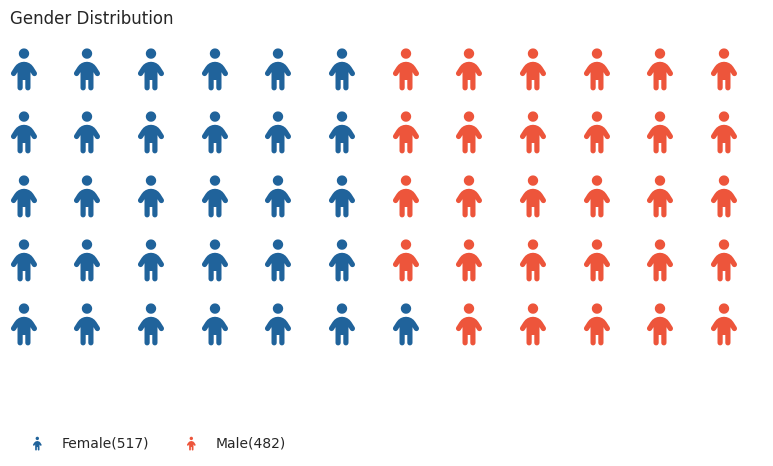

In [86]:
from pywaffle import Waffle

gender = df['Gender'].value_counts()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=12,
    values=gender,
    colors=('#20639B', '#ED553B', '#3CAEA3', '#F5D55C')[:len(gender)],
    title={'label': 'Gender Distribution', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(gender.index, gender)],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(df), 'framealpha': 0},
    font_size=30,
    icons='child',
    figsize=(12, 5),
    icon_legend=True
)

plt.show()


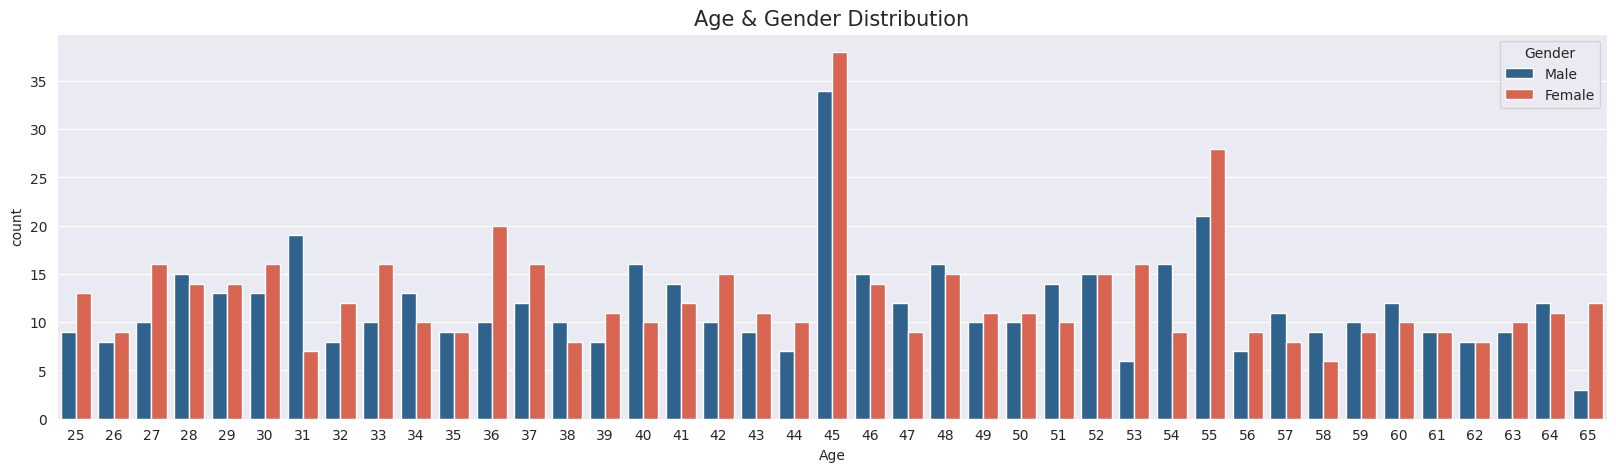

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

sns.set_palette(sns.color_palette(['#20639B', '#ED553B']))

sns.countplot(x='Age', hue='Gender', data=df,
              order = df['Age'].value_counts().sort_index().index,
              ax=ax )

plt.title('Age & Gender Distribution', size=15)
plt.show()

In [133]:
# Age & Gender's distribution
dist_age = df[['Gender', 'Age']].groupby('Age')['Gender'].value_counts().unstack()

for i in dist_age.columns:
    dist_age[i] = dist_age[i].apply(lambda x : x/gender[i])

top_labels = sorted(df['Age'].unique())

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)','rgba(190, 192, 213, 0.95)',
          'rgba(190, 192, 213, 0.90)','rgba(190, 192, 213, 0.85)',
          'rgba(190, 192, 213, 0.80)','rgba(190, 192, 213, 0.75)',
          'rgba(190, 192, 213, 0.70)','rgba(190, 192, 213, 0.65)',
          'rgba(190, 192, 213, 0.60)']

x_data = dist_age.T.values.round(2)

y_data = ['Female',
          'Male',
          'Prefer not to say',
          'Prefer to self-describe']

fig = go.Figure()

for i in range(0, min(len(x_data[0]), len(colors))):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(
    title="Age ratio distribution by gender",
    annotations=annotations)

fig.show()

In [134]:
dist_ratio = df.groupby('Country')['Gender'].value_counts().unstack().fillna(0)
dist_ratio['Female/Male'] = dist_ratio['Female'] / dist_ratio['Male']

print('Average female / male ratio')
print(sum(dist_ratio['Female']) / sum(dist_ratio['Male']))

Average female / male ratio
1.0726141078838174


In [135]:
dist_ratio['Country'] = dist_ratio.index
fig = px.choropleth(dist_ratio, locations='Country',
                    locationmode='country names',
                    color="Female/Male",
                    color_continuous_scale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]])
fig.update_layout(title="Female to male Ratio")
fig.show()

In [136]:
from plotly.subplots import make_subplots

import numpy as np

x = df.Country.value_counts().index[:7]

y_saving = df.groupby('Country').count().loc[x]['Gender']
y_net_worth = dist_ratio.loc[x]['Female/Male']



x = df.Country.value_counts().index[:7]

# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=y_saving,
    y=x,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Country Employee',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=y_net_worth, y=x,
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Female / male ratio',
), 1, 2)

fig.update_layout(
    title='Top most employee by Country',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
        dtick=1000
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=0.05,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(y_saving, decimals=2)
y_nw = np.round(y_net_worth, decimals=4)

for ydn, yd, xd in zip(y_nw, y_s, x):
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn+0.03,
                            text='{:,}'.format(ydn) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))

    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 200,
                            text=str(yd),
                            font=dict(family='Arial', size=12,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))

annotations.append(dict(xref='paper', yref='paper',
                        x=-0.2, y=-0.109,
                        text='Most countries with a lot of employee can see that the female / male ratio is below the average.',
                        font=dict(family='Arial', size=10, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

In [137]:
y = df.Country.value_counts()

fig = go.Figure(go.Treemap(
    labels = y.index,
    parents = ['World'] * len(y),
    values = y
))

fig.update_layout(title = '# Country of Employee')
fig.show()

In [138]:
jobs = df.groupby('Job Title').size().reset_index().sort_values(by=0,ascending = False)
jobs.head()

,Job Title,0
9,Director,121
27,Sr. Manger,109
32,Vice President,105
16,Manager,98
25,Sr. Analyst,70


In [139]:
# function to define figure
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 20}

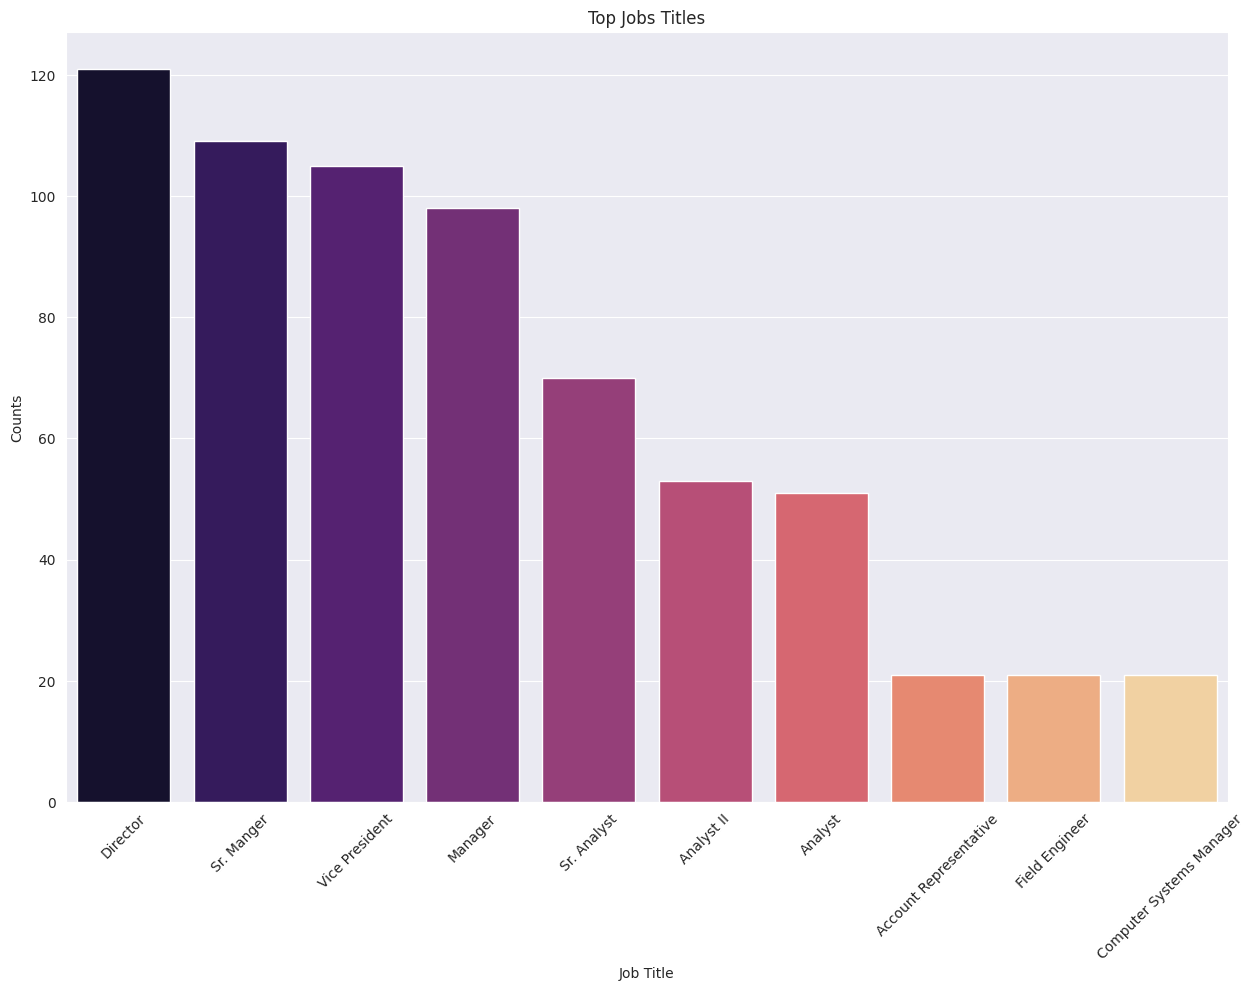

In [140]:
figure_size()
sns.set_style("darkgrid")
sns.barplot(x='Job Title',y=0,data = jobs[:10],palette = 'magma')
plt.title('Top Jobs Titles')
plt.xlabel('Job Title')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [141]:
fig = px.pie(jobs[:10], values=0, names='Job Title', title='Top Job Title ')
fig.show()

In [142]:
ax2= px.treemap(df,path=['Job Title'],title="Top Job Titles")
ax2.show()

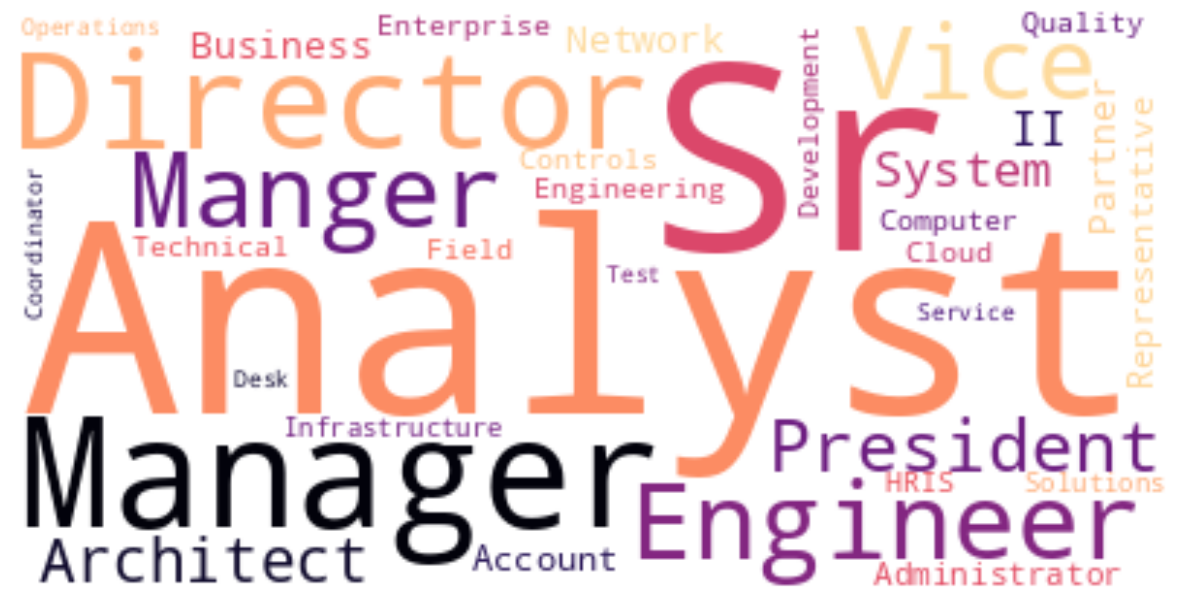

In [143]:
text = " ".join(job_titles for job_titles in df["Job Title"])
word_cloud = WordCloud(collocations = False, background_color = 'white', colormap = 'magma', min_font_size = 8).generate(text)
figure_size()
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()